In [57]:
import pandas 

df = pandas.read_csv( '../clean_data/clean_for_pandas.csv', index_col='name' )
print df.dtypes

df['pos'] = df.index.str[1:-1]
seq_sorted = df.sort_values( 'pos' )
seq_sorted.head()

wt = df.loc[ 'BglB' ]
df.drop( 'BglB', inplace=True )

y          float64
km         float64
ekm        float64
kcat       float64
ekcat      float64
ki         float64
eki        float64
kcatkm     float64
ekcatkm    float64
dtype: object


So what are some interesting bits of information we can add to this table? 

## Computational features 

+ 45 features output by enzdes_out flag 
+ features output by FeaturesReporter

## Evolutionary information 

+ dN/dS for each residue (dN/dS for codons?)
+ conserved residues in Pfam alignment, type and frequency 
+ anything else from multiple sequence alignment? 

## Metadata 

Can't think of a better word for it. 

+ sequence position 
+ native residue 
+ designed residue 
+ next favorite residue in pfam/favorite residue in pfam? what does this mean?

In [58]:
df['native'] = df.index.str[0]
df['design'] = df.index.str[-1]
df.sample(10)

,y,km,ekm,kcat,ekcat,ki,eki,kcatkm,ekcatkm,pos,native,design
name,,,,,,,,,,,,
S17E,1.01,7.32,0.38,641,9,NaN,NaN,87596,4719,17,S,E
C167A,0.48,14.56,1.27,479,14,NaN,NaN,32884,3026,167,C,A
Y166P,0.18,2.50,0.45,27,1,94.95,10.18,10596,1981,166,Y,P
W34A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,W,A
R240A,1.11,19.46,1.17,11011,258,NaN,NaN,565763,36384,240,R,A
E154D,1.42,3.46,0.76,878,47,NaN,NaN,254004,57175,154,E,D
K341A,0.92,5.46,0.33,1046,17,NaN,NaN,191689,12041,341,K,A
L171A,0.38,11.09,0.42,807,9,NaN,NaN,72719,2851,171,L,A
H119E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119,H,E


([<matplotlib.axis.YTick at 0x10bad3650>,
 <a list of 5 Text yticklabel objects>)

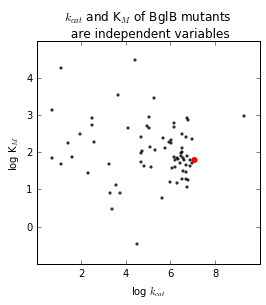

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt 
from numpy import log

plt.figure( figsize=(4,4) )
plt.scatter( log(df.kcat), log(df.km), alpha=0.7, color='black', marker='.' )
plt.text( log( wt.kcat ), log( wt.km ), u'•', color='red', fontsize=22 )
plt.title( "$k_{cat}$ and K$_M$ of BglB mutants\n are independent variables")
plt.xlabel( "log $k_{cat}$" )
plt.ylabel( "log K$_M$" )
xticks = plt.xticks()[0]; plt.xticks( xticks[1:-1] )
yticks = plt.yticks()[0]; plt.yticks( yticks[1:-1] )

As you can see, our data set is massively skewed towards mutants that have a lower kcat than wild type (depicted in red). In fact, there is only one mutant in our set that has a higher kcat than the wild type. 

For K$_M$, the story is different, we are sampling a lot more space. I'm not clear how we're getting 4 orders of magnitude though, since our assay is only testing 8 substrate concentrations between 0 and 75 mM.

6.77992190747
1.60943791243
12.078239274


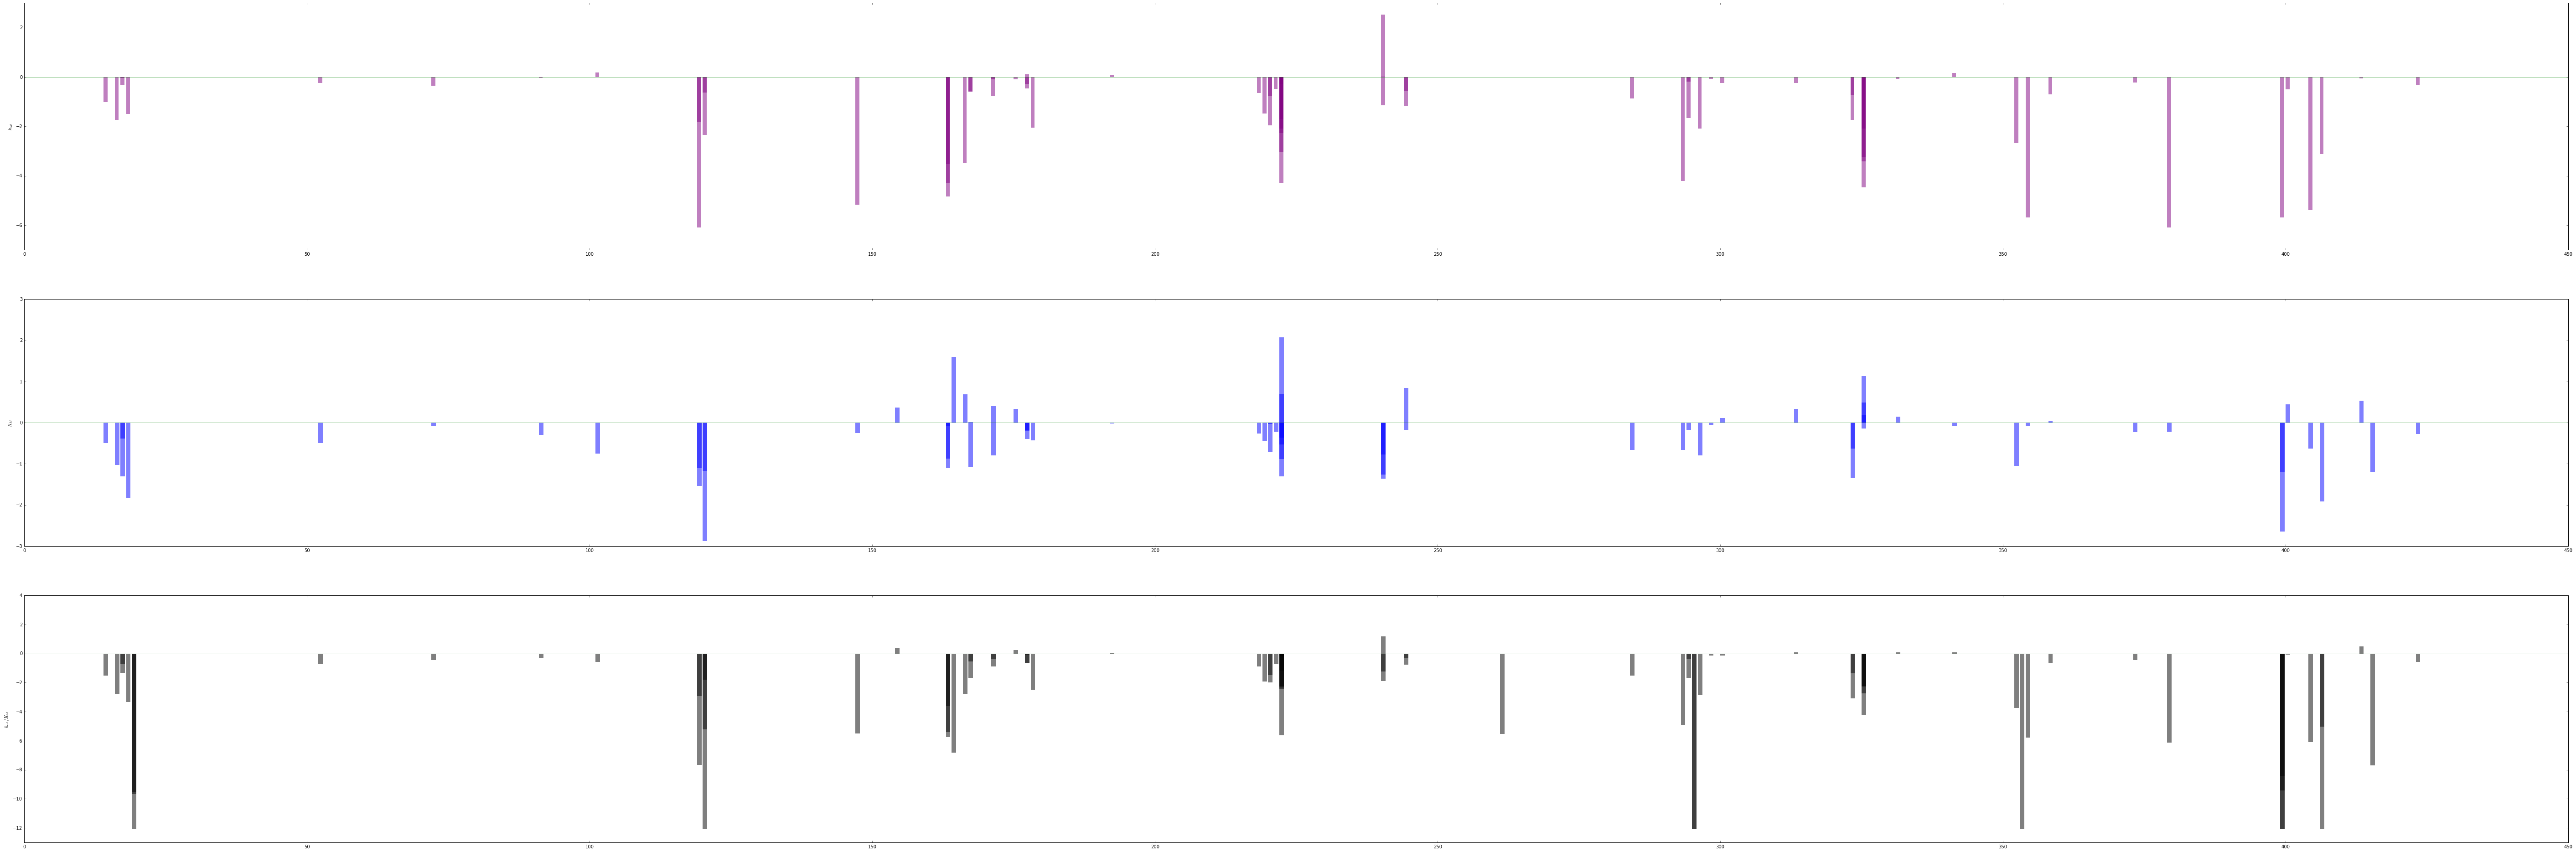

In [60]:
plt.figure( figsize=( 100, 33 ) )

plt.subplot('311')
plt.bar( df.pos, log( df.kcat / wt.kcat ), linewidth=0, width=0.7, color='purple', alpha=0.5 )
plt.plot( [ 0, 450 ], 2 * [ log( wt.kcat / wt.kcat ) ], color='g', alpha=0.5 )
plt.ylabel( '$k_{cat}$' )
print log( wt.kcat )

plt.subplot('312')
plt.bar( df.pos, log( (1/df.km) / (1/wt.km) ), linewidth=0, alpha=0.5 )
plt.plot( (0,450),(0,0), color='g', alpha=0.5 )
plt.ylabel( '$K_M$' )
print log( wt.km )

plt.subplot('313')
plt.bar( df.pos, log( df.kcatkm / wt.kcatkm ), linewidth=0, color='black', alpha=0.5 )
plt.plot( [ 0, 450 ], 2 * [ log( wt.kcatkm / wt.kcatkm ) ], color='g', alpha=0.5 )
plt.ylabel( '$k_{cat}/K_M$' )
plt.ylim((-13,4))
print log( wt.kcatkm )

## Sequence-functional space sampled 

Well, even the quick calculation $\frac{100}{8880} = 1.1%$ tells us that we're not exhaustively sampling the sequence-functional landscape for this protein. A plot makes it more clear.

In [112]:
from mpl_toolkits.mplot3d import Axes3D
from Bio.Alphabet.IUPAC import IUPACProtein

phils_dict = dict( zip( IUPACProtein.letters, range( 1, 21) ) )

x = df.pos.values.astype( 'int' )
y = df.kcat
z = df.native.map( phils_dict )

print x, y, z
print x.shape, y.shape, z.shape

[315 323 329 355 403 405 407 407 407 407 409 300 399 154 404 240 222 399
 119 373 192 220 325 240 413 163 298 325 423 313 171 163 101 119  17 120
 218  52 177 399 177 167 399 341 331 323 175  16 240 120 177 295 163 221
 294 222 222 352 295 293  17 358 220  14 244 294 406 353 415 284 222  91
 167 219  72  19 164 400  19 296 171 323 354 222 406  19 325 178 147 325
 244 166  18 120 222 379 261  34  76 119] name
H315N      NaN
M323K      NaN
P329W      NaN
G355A      NaN
D403A      NaN
F405A      NaN
W407A      NaN
W407G      NaN
W407Q      NaN
W407R      NaN
W409A      NaN
I300N      693
W399S      NaN
E154D      878
N404A        4
R240K      898
E222Q      668
W399G      NaN
H119A      143
H373R      707
A192S      946
N220H      123
W325H       35
R240A    11011
K413A      835
N163C       26
S298E      809
W325L      109
E423S      646
Q313R      689
         ...  
E222K      108
I91E       846
C167A      479
L219A      199
F72A       613
Q19S       NaN
E164A        0
S400A      531
Q19

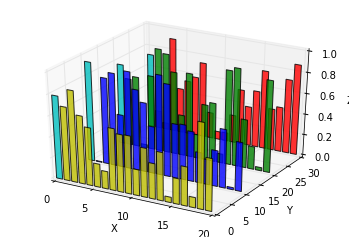

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Structure-based analysis 

What are some ways that we can overlay our experimental data on the crystal structure? Here's an attempt where the thickness of the residue lines is proportional to the residue's contribution to KM, calculated by the mutant's KM divided by wild type KM. 

In [312]:
from subprocess import call 

with open( 'pymol_command.pml', 'w' ) as script:
    
    # initial setup
    script.write( 'load bagel.pdb\n' )
    script.write( 'remove hydrogens\n' )
    script.write( '\n' )
    script.write( 'select bb, name c+o+n\n' )
    script.write( 'sele mutants, not bb and resi {}\n'.format( '+'.join( df.pos ) ) )
    script.write( 'hide everything\n' )
    script.write( 'show sticks, organic\n' )
    script.write( 'color white, organic\n' )
    script.write( 'util.cnc organic\n' )
    script.write( 'set ray_shadows, 0\n' )
    script.write( 'bg_color white; set ray_trace_mode, 3\n' )

    ala = df[(df.y>0)&(df.design=='A')].copy()
    ala['rel_km'] = ala.km / wt.km
    ala['rel_km'] = ala.rel_km / ala.rel_km.max()
    script.write( 'sele ala, not bb and resi {}\n'.format( '+'.join( ala.pos ) ) )
    for ( index, series ) in ala.iterrows():
        if series.rel_km > 0: 
            script.write( 'create {}, resi {} and not bb \n'.format( index, series.pos ) )
            script.write( 'show sticks, {} \n'.format( index ) )
            script.write( 'set stick_radius, {}, {} \n'.format( series.rel_km, index ) )

    # finally, write out a nice image
    script.write( 'orient ala\n' )
    script.write( 'ray 1900,1600 \n png pymol_out.png' )
    
command = [ 'pymol', '-c', '-r', 'pymol_command.pml' ]
call( command )
#!open -a Preview pymol_out.png

0

![](pymol_out.png)

## Expression-structure 

This one colors residues that, when mutated to alanine, result in the protein not expressing in our system. 

In [316]:
from subprocess import call 

with open( 'pymol_command.pml', 'w' ) as script:
    script.write( 'load bagel.pdb\n' )
    script.write( 'hide everything\n remove hydrogens \n' )
    script.write( 'show cartoon\n' )
    script.write( 'select bb, name c+o+n\n' )
    script.write( 'show sticks, organic\n' )
    script.write( 'color white, organic\n' )
    script.write( 'util.cnc organic\n' )
    script.write( 'set ray_shadows, 0\n' )
    script.write( 'bg_color white; set ray_trace_mode, 3\n' )

    no_expr = []
    script.write( 'set sphere_scale, 0.18' )
    for ( index, series ) in df.iterrows():
        if pandas.isnull( series.y ):
            script.write( 'color red, resi {}\n'.format( series.pos ) )
            script.write( 'show spheres, resi {} and name ca\n'.format( series.pos ) )
            no_expr.append( series.pos )
        
    # finally, write out a nice image
    script.write( 'orient resi {} \n'.format( '+'.join( no_expr ) ) )
    script.write( 'rotate y, 90 \n' )
    script.write( 'ray 1900,1600 \n png pymol_out.png' )
    
command = [ 'pymol', '-q', '-r', 'pymol_command.pml' ]
call( command )
#!open -a Preview pymol_out.png #--background

0

![](pymol_out.png)

In [317]:
df

,y,km,ekm,kcat,ekcat,ki,eki,kcatkm,ekcatkm,pos,native,design
name,,,,,,,,,,,,
H315N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315,H,N
M323K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323,M,K
P329W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329,P,W
G355A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355,G,A
D403A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403,D,A
F405A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405,F,A
W407A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407,W,A
W407G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407,W,G
W407Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407,W,Q


## Structure-turnover 

Now let's look at kcat, the turnover number. Representing the rate enhancemnet that the enzyme provides.

In [329]:
from subprocess import call 

with open( 'pymol_command.pml', 'w' ) as script:
    
    # initial setup
    script.write( 'load bagel.pdb\n' )
    script.write( 'remove hydrogens\n' )
    script.write( '\n' )
    script.write( 'select bb, name c+o+n\n' )
    script.write( 'sele mutants, not bb and resi {}\n'.format( '+'.join( df.pos ) ) )
    script.write( 'hide everything\n' )
    script.write( 'show sticks, organic\n' )
    script.write( 'color white, organic\n' )
    script.write( 'util.cnc organic\n' )
    script.write( 'set ray_shadows, 0\n' )
    script.write( 'bg_color white; set ray_trace_mode, 3\n' )

    ala = df[(df.y>0)&(df.design=='A')].copy()
    ala.drop( 'R240A', inplace=True )
    ala['rel_kcat'] = ala.kcat / wt.kcat
    ala['rel_kcat'] = ala.rel_kcat / ala.rel_kcat.max()

    script.write( 'sele ala, not bb and resi {}\n'.format( '+'.join( ala.pos ) ) )
    for ( index, series ) in ala.iterrows():
        if series.rel_kcat > 0: 
            script.write( 'create {}, resi {} and not bb \n'.format( index, series.pos ) )
            script.write( 'show sticks, {} \n'.format( index ) )
            script.write( 'set stick_radius, {}, {} \n'.format( series.rel_kcat, index ) )

    # finally, write out a nice image
    script.write( 'orient ala\n' )
    script.write( 'ray 900,600 \n png pymol_out.png' )
    
command = [ 'pymol', '-c', '-r', 'pymol_command.pml' ]
call( command )
!open -a Preview pymol_out.png